Installing package into ‘/srv/rlibs’
(as ‘lib’ is unspecified)



[1] "Frey index : No clustering structure in this data set"
*** : The Hubert index is a graphical method of determining the number of clusters.
                In the plot of Hubert index, we seek a significant knee that corresponds to a 
                significant increase of the value of the measure i.e the significant peak in Hubert
                index second differences plot. 
 


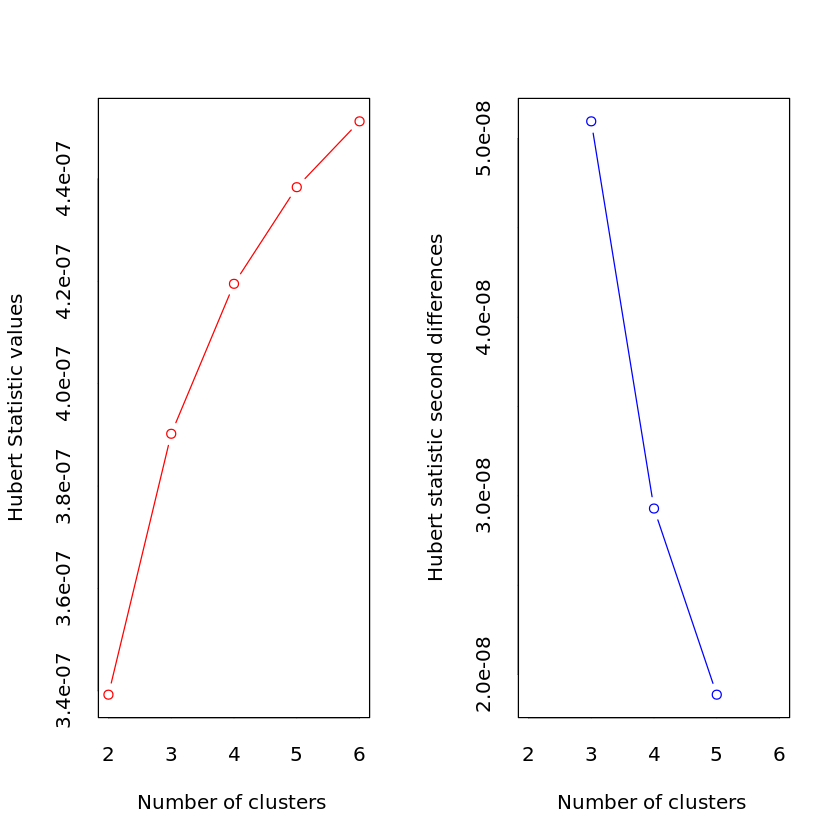

*** : The D index is a graphical method of determining the number of clusters. 
                In the plot of D index, we seek a significant knee (the significant peak in Dindex
                second differences plot) that corresponds to a significant increase of the value of
                the measure. 
 
******************************************************************* 
* Among all indices:                                                
* 6 proposed 2 as the best number of clusters 
* 6 proposed 3 as the best number of clusters 
* 2 proposed 4 as the best number of clusters 
* 6 proposed 5 as the best number of clusters 
* 3 proposed 6 as the best number of clusters 

                   ***** Conclusion *****                            
 
* According to the majority rule, the best number of clusters is  2 
 
 
******************************************************************* 



  1   2   3 
979 423  75 

         
            1   2   3
  Current 523 264  45
  InVol   132   0   0
  Vol     324 159  30

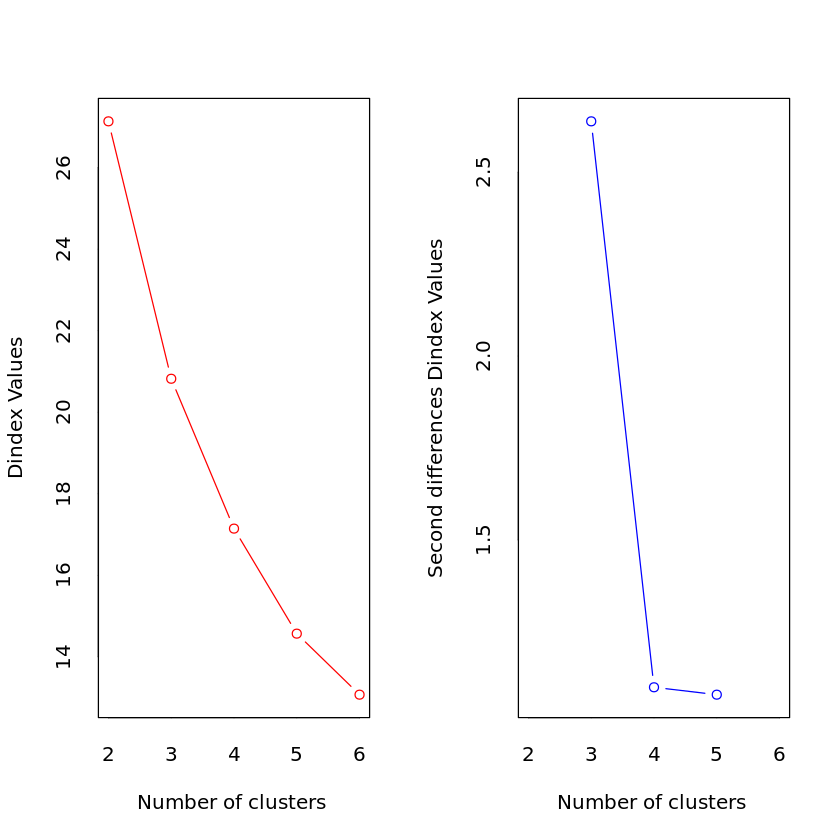

,ID,LONGDIST,International,LOCAL,DROPPED,PAY_MTHD,LocalBillType,LongDistanceBillType,AGE,SEX,STATUS,CHILDREN,Est_Income,Car_Owner,CHURNED
,<int>,<dbl>,<dbl>,<dbl>,<int>,<fct>,<fct>,<fct>,<int>,<fct>,<fct>,<int>,<dbl>,<fct>,<fct>
2,3,0.000000,0.00000,3.94229,0,CC,Budget,Intnl_discount,50,F,S,2,64632.3,N,InVol
3,4,5.555640,0.00000,9.36347,1,CC,Budget,Intnl_discount,68,F,M,2,81000.9,N,Vol
4,8,14.019300,5.68043,29.80650,0,CC,Budget,Standard,34,M,S,0,87467.1,Y,Current
5,10,13.664000,2.95642,32.63810,0,CC,FreeLocal,Intnl_discount,60,M,M,2,83220.6,N,Vol
6,11,0.000000,0.00000,1.41294,0,CC,FreeLocal,Standard,84,F,S,0,50290.7,N,InVol
7,13,0.281029,0.00000,8.53692,0,CH,Budget,Intnl_discount,28,F,M,2,20850.4,N,Vol



Call:
lm(formula = LONGDIST ~ Cluster, data = churn4)

Residuals:
     Min       1Q   Median       3Q      Max 
-15.8734  -8.7239   0.0896   8.5000  16.9164 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  11.4549     0.6291  18.208  < 2e-16 ***
Cluster       1.5724     0.4180   3.762 0.000175 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 9.353 on 1475 degrees of freedom
Multiple R-squared:  0.009504,	Adjusted R-squared:  0.008832 
F-statistic: 14.15 on 1 and 1475 DF,  p-value: 0.0001752


Installing package into ‘/srv/rlibs’
(as ‘lib’ is unspecified)




 TUKEY TEST TO COMPARE MEANS 
 
 Confidence level:  0.95 
 Dependent variable:  LONGDIST
 Variation Coefficient:  68.58155 % 
 
Independent variable:  Cluster 
  Factors Means              
  2       15.2900681394799 a 
  3       14.2251688666667 ab
  1       12.878123011236   b

 

 TUKEY TEST TO COMPARE MEANS 
 
 Confidence level:  0.95 
 Dependent variable:  International
 Variation Coefficient:  266.5946 % 
 
Independent variable:  Cluster 
  Factors Means               
  2       1.1447551536643   a 
  3       1.04083594666667  ab
  1       0.687479179775281  b

 

 TUKEY TEST TO COMPARE MEANS 
 
 Confidence level:  0.95 
 Dependent variable:  LOCAL
 Variation Coefficient:  50.75532 % 
 
Independent variable:  Cluster 
  Factors Means               
  3       219.836106666667 a  
  2       89.3223988179669  b 
  1       22.0573890837589   c

 


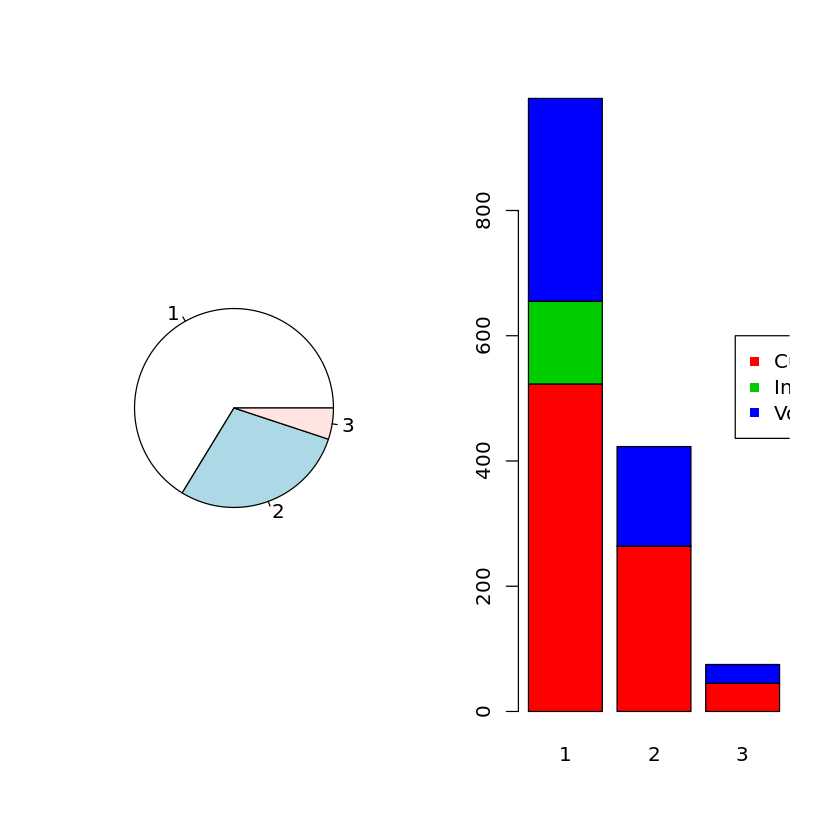

In [1]:
churnall=read.table("churn.txt",header=T, sep=",")
churnall=na.exclude(churnall)
churn=churnall[,c(2:4)]

# clustering analysis
install.packages("NbClust")
library(NbClust)
result=NbClust(churn,distance="euclidean",min.nc=2,max.nc=6,method="kmeans", index="all")

churn.result=kmeans(churn,3)
table(churn.result$cluster)
pie(table(churn.result$cluster))
table(churnall$CHURNED,churn.result$cluster)
barplot(table(churnall$CHURNED,churn.result$cluster), col=2:4)
legend(3,600,c("Current","Invol","Vol"),col=2:4,pch=15)
head(churnall[churn.result$cluster==1,])

churn4=data.frame(churn,Cluster=churn.result$cluster)
model=lm(LONGDIST~Cluster,data=churn4)
summary(model)
install.packages("laercio")
library(laercio)
LTukey(aov(LONGDIST~Cluster,data=churn4), "Cluster")
LTukey(aov(International~Cluster,data=churn4), "Cluster")
LTukey(aov(LOCAL~Cluster,data=churn4), "Cluster")